In [ ]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

# 텐서플로우 GPU 사용하는지 확인

In [ ]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

2023-03-03 15:02:54.731543: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1613] Created device /device:GPU:0 with 4530 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 2060, pci bus id: 0000:01:00.0, compute capability: 7.5


[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 10280434222802937447
 xla_global_id: -1,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 4750245888
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 5804048116649440543
 physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 2060, pci bus id: 0000:01:00.0, compute capability: 7.5"
 xla_global_id: 416903419]

In [ ]:
import tensorflow as tf
print(tf.__version__)

In [ ]:
model = keras.Sequential()
# input_shape는 앞서 28*28*1의 이미지
# 32개의 필터를 사용
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(28,28,1)))
# (2,2)사이즈의 맥스풀링을 제일 많이사용
# 결과는 14*14*32의 특성 맵이 만들어진다
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu', padding='same'))
# 14*14*64
model.add(keras.layers.MaxPooling2D(2))
# 7*7*64
model.add(keras.layers.Flatten())
# 마지막의 10개의 뉴런을 가진 출력층에서 확률 계산을 위해 3차원 특성 맵을 일렬로 펼친다
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.3))
# 10개의 클래스를 지닌 다중 분류 문제이므로 소프트맥스 함수를 이용
model.add(keras.layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 3136)              0         
                                                                 
 dense_2 (Dense)             (None, 100)              

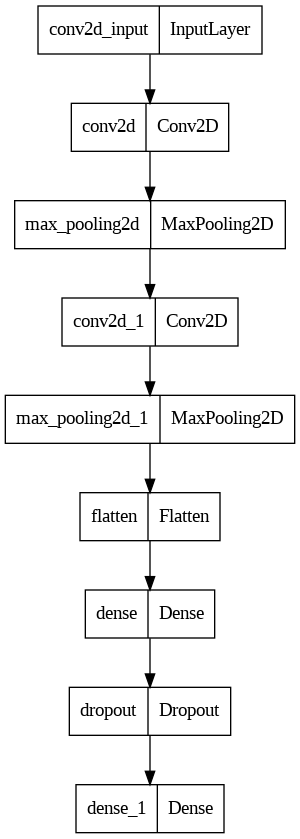

In [ ]:
keras.utils.plot_model(model)

In [ ]:
keras.utils.plot_model(model, show_shapes=True,to_file="./drive/MyDrive/개인 공부/ML_DL/data/cnn-architecture.png",dpi=300)

In [ ]:
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics="accuracy")
checkpoint_cb = keras.callbacks.ModelCheckpoint("./drive/MyDrive/개인 공부/ML_DL/data/best-cnn-model.h5",save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
hitsory = model.fit(train_scaled,train_target,epochs=20,verbose=1,\
                    validation_data=(val_scaled,val_target),callbacks=[checkpoint_cb,early_stopping_cb])
# 8번째 에포크에서 최상의 점수를 확인

Epoch 1/20
1500/1500 [==============================] - 18s 5ms/step - loss: 0.5043 - accuracy: 0.8195 - val_loss: 0.3218 - val_accuracy: 0.8813
Epoch 2/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3343 - accuracy: 0.8794 - val_loss: 0.2816 - val_accuracy: 0.8971
Epoch 3/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2881 - accuracy: 0.8951 - val_loss: 0.2738 - val_accuracy: 0.8991
Epoch 4/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2547 - accuracy: 0.9065 - val_loss: 0.2441 - val_accuracy: 0.9107
Epoch 5/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2301 - accuracy: 0.9140 - val_loss: 0.2475 - val_accuracy: 0.9071
Epoch 6/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2105 - accuracy: 0.9215 - val_loss: 0.2436 - val_accuracy: 0.9124
Epoch 7/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.1917 - accuracy: 0.9288 - val_loss: 0.2254 - val_accuracy

In [ ]:
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics="accuracy")
checkpoint_cb = keras.callbacks.ModelCheckpoint("../data/best-cnn-model.h5",save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
hitsory = model.fit(train_scaled,train_target,epochs=20,verbose=1,\
                    validation_data=(val_scaled,val_target),callbacks=[checkpoint_cb,early_stopping_cb])
# 8번째 에포크에서 최상의 점수를 확인

Epoch 1/20


2023-03-03 15:06:32.074176: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 150528000 exceeds 10% of free system memory.
2023-03-03 15:06:32.168705: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 150528000 exceeds 10% of free system memory.
2023-03-03 15:06:33.461465: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8100
2023-03-03 15:06:34.851277: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x7fdee12b7f70 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-03-03 15:06:34.851300: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): NVIDIA GeForce RTX 2060, Compute Capability 7.5
2023-03-03 15:06:34.866073: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-03-03 15:06:35.038418: I tensorflow/compiler/jit/xla_compilation

1499/1500 [============================>.] - ETA: 0s - loss: 0.5055 - accuracy: 0.8178

2023-03-03 15:06:39.241166: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 37632000 exceeds 10% of free system memory.
2023-03-03 15:06:39.272588: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 37632000 exceeds 10% of free system memory.


1500/1500 [==============================] - 7s 2ms/step - loss: 0.5054 - accuracy: 0.8178 - val_loss: 0.3237 - val_accuracy: 0.8814
Epoch 2/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3284 - accuracy: 0.8812 - val_loss: 0.2671 - val_accuracy: 0.9018
Epoch 3/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.2821 - accuracy: 0.8979 - val_loss: 0.2469 - val_accuracy: 0.9078
Epoch 4/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2510 - accuracy: 0.9086 - val_loss: 0.2580 - val_accuracy: 0.9052
Epoch 5/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2288 - accuracy: 0.9160 - val_loss: 0.2301 - val_accuracy: 0.9165
Epoch 6/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2063 - accuracy: 0.9225 - val_loss: 0.2234 - val_accuracy: 0.9168
Epoch 7/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1898 - accuracy: 0.9296 - val_loss: 0.2201 - val_accuracy: 0.9212
Epo

In [ ]:
model.evaluate(val_scaled,val_target)

 83/375 [=====>........................] - ETA: 0s - loss: 0.2128 - accuracy: 0.9224

2023-03-03 15:13:58.949686: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 37632000 exceeds 10% of free system memory.


375/375 [==============================] - 0s 1ms/step - loss: 0.2166 - accuracy: 0.9239


[0.21655002236366272, 0.9239166378974915]

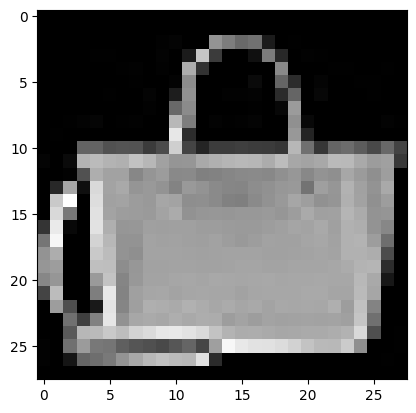

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(val_scaled[0].reshape(28,28),cmap="gray")
plt.show()

In [ ]:
# model = keras.models.load_model('./drive/MyDrive/개인 공부/ML_DL/data/best-cnn-model.h5')
# model.evaluate(val_scaled, val_target)

375/375 [==============================] - 2s 3ms/step - loss: 0.2174 - accuracy: 0.9223


[0.2174106389284134, 0.9223333597183228]

In [ ]:
model = keras.models.load_model('../data/best-cnn-model.h5')
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 1ms/step - loss: 0.2166 - accuracy: 0.9239


[0.21655002236366272, 0.9239166378974915]

In [ ]:
preds = model.predict(val_scaled[0:1])
print(preds)

1/1 [==============================] - 0s 97ms/step
[[2.0434911e-17 6.8159918e-26 3.7992704e-21 1.8578741e-18 1.2227812e-19
  3.7052702e-17 1.2758877e-20 3.4729356e-20 1.0000000e+00 1.6190535e-23]]


In [ ]:
import numpy as np
classes = ["티셔츠","바지","스웨터","드레스","코트","샌달","셔츠","스니커즈","가방","앵클 부츠"]
print(classes[np.argmax(preds)])

가방


In [ ]:
test_scaled = test_input.reshape(-1,28,28,1)/255.0
model.evaluate(test_scaled,test_target)

313/313 [==============================] - 1s 2ms/step - loss: 0.2352 - accuracy: 0.9180


[0.23515863716602325, 0.9179999828338623]